# Calculating confidence intervals # 
Info on how to calculate CFs for any values.  
Using this method to calculate .95% confidence intervals for NPS

Sources:  
[primer on bootstrapping](https://towardsdatascience.com/bootstrapping-using-python-and-r-b112bb4a969e)  
[statsmodels.stats](https://www.statsmodels.org/stable/stats.html#)  
[numpy.random.choice](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html)  
[pydatasets](https://towardsdatascience.com/datasets-in-python-425475a20eb1)  
[np way of calculating cf](https://www.statology.org/confidence-intervals-python/) 

From JP - the idea from R
[NPS conf scores](https://www.cybaea.net/Journal/2016/01/14/NPS-confidence-intervals-stats/)  

In [13]:
import numpy as np
import scipy.stats as st
from pydataset import data
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms


## Part 1:  Bootstrapping ##

(array([ 576., 1176., 2184., 1560.,  792.,  840.,  216.,  120.,   96.,
          24.]),
 array([11. , 13.8, 16.6, 19.4, 22.2, 25. , 27.8, 30.6, 33.4, 36.2, 39. ]),
 <BarContainer object of 10 artists>)

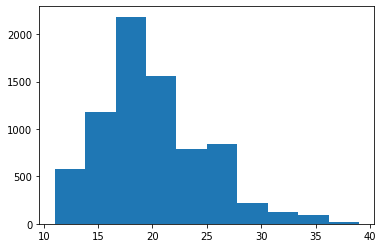

In [2]:
data()
df=data("VerbAgg")
df
plot=np.histogram(df.Anger)
plt.hist(df.Anger)

In [3]:
np.mean(df.Anger)

20.003164556962027

In [4]:
sms.DescrStatsW(df.Anger).tconfint_mean()

(19.894192340139163, 20.11213677378489)

In [5]:
my_list=[]

In [6]:
for _ in range(5000):
    x=np.random.choice(df.Anger,size=300,replace=True)
    my_list.append(x.mean())


In [7]:
len(my_list)

5000

(array([  16.,   90.,  454., 1183., 1622., 1116.,  430.,   78.,    9.,
           2.]),
 array([18.97666667, 19.20666667, 19.43666667, 19.66666667, 19.89666667,
        20.12666667, 20.35666667, 20.58666667, 20.81666667, 21.04666667,
        21.27666667]),
 <BarContainer object of 10 artists>)

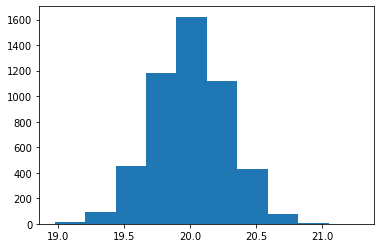

In [8]:
plt.hist(my_list)

In [9]:
np.mean(my_list)

20.00133466666667

In [10]:
sms.DescrStatsW(my_list).tconfint_mean()

(19.993562425263086, 20.00910690807025)

## Part 2:  Applying bootstrapping to NPS ##

In [ ]:
st.norm.interval